![image info](ted.png)

**Este dataset esta compuesto por todos los videos cargados en las playlist de las diferentes TEDx (Rio de la plata, Córdoba y Rosario) e info relevante a esos videos.**

## Features
**Fecha_Publicación**: Fecha de publicación del video

**Titulo**: Nombre de la charla

**viewCount**: Cantidad de views

**likeCount**: Cantidad de likes

**dislikeCount**: Cantidad de dislikes 

**commentCount**: Cantidad de comentarios

**Duración [segs]**: Duración total del video (en segundos)

**Tags**: Tags definidos por el usuario (sirven para clasificar el video en la plataforma)

**Descripcion**: Descripción del video

**videoID**: id del video

**Edicion**: Edición Tedx

**TEDx**: Lugar en donde se realizó el evento Tedx

## Objetivos

Antes de empezar a trabajar, no olvides revisar si existen valores faltantes o nulos y definir una estrategia sobre qué hacer con ellos. 

Puede servirte también conocer qué tipo de datos es cada feature ya que de eso dependerá su tratamiento (ej: saber si fecha esta como str, convertirlo a formato date)

1.	¿Cuántos videos contiene el dataset?
2.	¿Cuántas features contiene el dataset?
3.	¿Qué video es el de mayor duración?
4.	¿Qué Tedx tiene más videos? (columna TEDx)
5.	¿Cuál es el video de mayor duración de TEDx Rosario?
6.	Agregar una columna llamada 'likeCount/viewCount' y calcular para cada registro esa división.
7.	Idem punto 6, pero el indicador debe ser 'commentCount/viewCount'
8.	Agregar una columna que clasifique los videos en Largos (mayores a 1000 segs), Cortos (entre 999 y 400 segs) y Muy cortos (entre 399 y 0 segs)
9.	Graficar la cantidad de videos por año (hacer un pie plot y un bar plot)
10.	Hacer un modelo de clasificación al cual le paso 'likeCount', 'dislikeCount', 'commentCount', 'Duración [segs]', que me devuelve la cantidad de views que puede tener un video determinado.



**Bonus track:** Hacer una wordcloud de los tags más mencionados.

### Mucha Suerte :) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [3]:
df=pd.read_csv('Tedx.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fecha_Publicación  598 non-null    object 
 1   Titulo             598 non-null    object 
 2   viewCount          598 non-null    object 
 3   likeCount          598 non-null    float64
 4   dislikeCount       598 non-null    float64
 5   commentCount       598 non-null    float64
 6   Duración [segs]    598 non-null    float64
 7   Tags               593 non-null    object 
 8   Descripcion        581 non-null    object 
 9   videoID            598 non-null    object 
 10  Edicion            598 non-null    object 
 11  TEDx               598 non-null    object 
dtypes: float64(4), object(8)
memory usage: 56.2+ KB


## Data Wrangling 

Se puede ver que se utiliza el punto(".") tanto como separador de miles como de decimales, lo que me generaría conclusiones erróneas.

In [5]:
df.head() 

Fecha_Publicación                                             Titulo  \
0          16/11/18                       Experiencia TEDxCórdoba 2018   
1          19/12/18  Una receta para tomar riesgos | Javier Rodrígu...   
2          14/01/19  El déficit de atención (TDAH) en la escuela | ...   
3          19/12/18  Tanto trabajo para no trabajar | Alejandro Orl...   
4          23/01/19  Entre el rosa y el azul | Agus Cornejo Pinti |...   

  viewCount  likeCount  dislikeCount  commentCount  Duración [segs]  \
0     1.007     18.000           0.0           0.0            111.0   
1     9.605    201.000           6.0           7.0            921.0   
2    55.913      2.148          45.0         286.0            385.0   
3     3.285     78.000           3.0           3.0            865.0   
4       576     25.000           2.0           3.0            295.0   

                                                Tags  \
0                                        ['Córdoba']   
1  ['TEDxTalks', 'Spanish', 'Business', 'Cooking'...   
2  ['TEDxTalks', 'Spanish', 'Health', 'Activism',...   
3  ['TEDxTalks', 'Spanish', 'Entertainment', 'Art...   
4  ['TEDxTalks', 'Spanish', 'Life', 'Activism', '...   

                                         Descripcion      videoID  \
0  Más de 1600 personas colmaron las instalacione...  nnvzEfVdKwk   
1  Javier es uno de los chefs más reconocidos en ...  Q5jqL2KC4Yk   
2  En su charla nos invita a conocer cuáles son l...  n5SaHkzv468   
3  Alejandro es un actor cordobés. Desde chico de...  RkVwAxY8sGE   
4  Su charla cuenta en primera persona la incomod...  xhKTrTnXOU0   

            Edicion         TEDx  
0  TEDxCórdoba 2018  TEDxCórdoba  
1  TEDxCórdoba 2018  TEDxCórdoba  
2  TEDxCórdoba 2018  TEDxCórdoba  
3  TEDxCórdoba 2018  TEDxCórdoba  
4  TEDxCórdoba 2018  TEDxCórdoba

**Ejemplo video [Las puertas de una vida ](https://www.youtube.com/watch?v=Jx3vjKJPfWw):**

Decidí buscar este video en Youtube para comparar. El mismo tiene: 
- 1622 vistas (viewCount)
- 40 me gusta (likeCount)
- 0 no me gusta (dislikeCount)
- 1 comentario (commentCount)
- 18 minutos con 17 segundos de Duración (1097 segundos)

Como puede verse a continuación, el punto(".") está utilizado en el archivo como separador de miles y de decimales.

In [6]:
df[df['Titulo']=='Las puertas de una vida | Jairo . | TEDxCordoba']

Fecha_Publicación                                           Titulo  \
30          13/02/18  Las puertas de una vida | Jairo . | TEDxCordoba   

   viewCount  likeCount  dislikeCount  commentCount  Duración [segs]  \
30     1.622       40.0           0.0           1.0            1.098   

                                                 Tags  \
30  ['TEDxTalks', 'Spanish', 'Life', 'Art', 'Emoti...   

                                          Descripcion      videoID  \
30  ¿Qué harías si volvieras a vivir? En el relato...  Jx3vjKJPfWw   

             Edicion         TEDx  
30  TEDxCórdoba 2017  TEDxCórdoba

In [7]:
#El valor 1.098 en la columna Duración es menor que 2 ("True"), comprobando el error. 

df[df['Titulo']=='Las puertas de una vida | Jairo . | TEDxCordoba']['Duración [segs]'] < 2 

30    True
Name: Duración [segs], dtype: bool

In [8]:
df=pd.read_csv('Tedx.csv', decimal=',') #cambio separador de decimales por coma (",")

In [9]:
df.head()

Fecha_Publicación                                             Titulo  \
0          16/11/18                       Experiencia TEDxCórdoba 2018   
1          19/12/18  Una receta para tomar riesgos | Javier Rodrígu...   
2          14/01/19  El déficit de atención (TDAH) en la escuela | ...   
3          19/12/18  Tanto trabajo para no trabajar | Alejandro Orl...   
4          23/01/19  Entre el rosa y el azul | Agus Cornejo Pinti |...   

  viewCount likeCount dislikeCount commentCount Duración [segs]  \
0     1.007      18.0          0.0          0.0           111.0   
1     9.605     201.0          6.0          7.0           921.0   
2    55.913     2.148         45.0        286.0           385.0   
3     3.285      78.0          3.0          3.0           865.0   
4       576      25.0          2.0          3.0           295.0   

                                                Tags  \
0                                        ['Córdoba']   
1  ['TEDxTalks', 'Spanish', 'Business', 'Cooking'...   
2  ['TEDxTalks', 'Spanish', 'Health', 'Activism',...   
3  ['TEDxTalks', 'Spanish', 'Entertainment', 'Art...   
4  ['TEDxTalks', 'Spanish', 'Life', 'Activism', '...   

                                         Descripcion      videoID  \
0  Más de 1600 personas colmaron las instalacione...  nnvzEfVdKwk   
1  Javier es uno de los chefs más reconocidos en ...  Q5jqL2KC4Yk   
2  En su charla nos invita a conocer cuáles son l...  n5SaHkzv468   
3  Alejandro es un actor cordobés. Desde chico de...  RkVwAxY8sGE   
4  Su charla cuenta en primera persona la incomod...  xhKTrTnXOU0   

            Edicion         TEDx  
0  TEDxCórdoba 2018  TEDxCórdoba  
1  TEDxCórdoba 2018  TEDxCórdoba  
2  TEDxCórdoba 2018  TEDxCórdoba  
3  TEDxCórdoba 2018  TEDxCórdoba  
4  TEDxCórdoba 2018  TEDxCórdoba

In [10]:
df[df['Titulo']=='Las puertas de una vida | Jairo . | TEDxCordoba']

Fecha_Publicación                                           Titulo  \
30          13/02/18  Las puertas de una vida | Jairo . | TEDxCordoba   

   viewCount likeCount dislikeCount commentCount     Duración [segs]  \
30     1.622      40.0          0.0          1.0  1.0979999999999999   

                                                 Tags  \
30  ['TEDxTalks', 'Spanish', 'Life', 'Art', 'Emoti...   

                                          Descripcion      videoID  \
30  ¿Qué harías si volvieras a vivir? En el relato...  Jx3vjKJPfWw   

             Edicion         TEDx  
30  TEDxCórdoba 2017  TEDxCórdoba

El problema es que ahora algunos números pueden tener error, como el que se ve en la Duración del video "Las puertas de una vida". Lo voy a solucionar en unos pasos más adelante.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Fecha_Publicación  598 non-null    object
 1   Titulo             598 non-null    object
 2   viewCount          598 non-null    object
 3   likeCount          598 non-null    object
 4   dislikeCount       598 non-null    object
 5   commentCount       598 non-null    object
 6   Duración [segs]    598 non-null    object
 7   Tags               593 non-null    object
 8   Descripcion        581 non-null    object
 9   videoID            598 non-null    object
 10  Edicion            598 non-null    object
 11  TEDx               598 non-null    object
dtypes: object(12)
memory usage: 56.2+ KB


Si yo ahora quiero pasar a formato numérico, los puntos usados como separadores me generan problemas, ya que python puede interpretarlos como decimales o generar un error como el siguiente: "Unable to parse string '1.048.651' ". Por lo que voy a eliminar los puntos para evitar esto.

Pero antes tengo que prestar atención a los números que efectivamente son decimales. De lo contrario tendré números más grandes de lo que en realidad son. Por ejemplo, 40.0 pasaría a valer 400 en vez de 40.

Analizando el dataset, se puede ver que los números que terminan en ".0", son números enteros con cero decimales. Por lo tanto voy a eliminar este ".0" en las columnas.

In [12]:
a="4056.0"

print(a[-2:])
print(a[:-2])

.0
4056


In [13]:
df['viewCount'] = df['viewCount'].apply(lambda x: x[:-2] if x[-2:]=='.0' else x )

In [14]:
df['likeCount'] = df['likeCount'].apply(lambda x: x[:-2] if x[-2:]=='.0' else x )

In [15]:
df['dislikeCount'] = df['dislikeCount'].apply(lambda x: x[:-2] if x[-2:]=='.0' else x )

In [16]:
df['commentCount'] = df['commentCount'].apply(lambda x: x[:-2] if x[-2:]=='.0' else x )

In [17]:
df['Duración [segs]'] = df['Duración [segs]'].apply(lambda x: x[:-2] if x[-2:]=='.0' else x )

In [18]:
df.head()

Fecha_Publicación                                             Titulo  \
0          16/11/18                       Experiencia TEDxCórdoba 2018   
1          19/12/18  Una receta para tomar riesgos | Javier Rodrígu...   
2          14/01/19  El déficit de atención (TDAH) en la escuela | ...   
3          19/12/18  Tanto trabajo para no trabajar | Alejandro Orl...   
4          23/01/19  Entre el rosa y el azul | Agus Cornejo Pinti |...   

  viewCount likeCount dislikeCount commentCount Duración [segs]  \
0     1.007        18            0            0             111   
1     9.605       201            6            7             921   
2    55.913     2.148           45          286             385   
3     3.285        78            3            3             865   
4       576        25            2            3             295   

                                                Tags  \
0                                        ['Córdoba']   
1  ['TEDxTalks', 'Spanish', 'Business', 'Cooking'...   
2  ['TEDxTalks', 'Spanish', 'Health', 'Activism',...   
3  ['TEDxTalks', 'Spanish', 'Entertainment', 'Art...   
4  ['TEDxTalks', 'Spanish', 'Life', 'Activism', '...   

                                         Descripcion      videoID  \
0  Más de 1600 personas colmaron las instalacione...  nnvzEfVdKwk   
1  Javier es uno de los chefs más reconocidos en ...  Q5jqL2KC4Yk   
2  En su charla nos invita a conocer cuáles son l...  n5SaHkzv468   
3  Alejandro es un actor cordobés. Desde chico de...  RkVwAxY8sGE   
4  Su charla cuenta en primera persona la incomod...  xhKTrTnXOU0   

            Edicion         TEDx  
0  TEDxCórdoba 2018  TEDxCórdoba  
1  TEDxCórdoba 2018  TEDxCórdoba  
2  TEDxCórdoba 2018  TEDxCórdoba  
3  TEDxCórdoba 2018  TEDxCórdoba  
4  TEDxCórdoba 2018  TEDxCórdoba

Ahora procedo a eliminar el resto de los puntos:

In [19]:
def eliminar_puntos(x):
    z=x.split('.')
    return ''.join(z)

In [20]:
a='1.266.865'
a

'1.266.865'

In [21]:
eliminar_puntos(a)

'1266865'

In [22]:
df['viewCount'] = df['viewCount'].apply(lambda x: eliminar_puntos(x))

In [23]:
df['likeCount'] = df['likeCount'].apply(lambda x: eliminar_puntos(x))

In [24]:
df['dislikeCount'] = df['dislikeCount'].apply(lambda x: eliminar_puntos(x))

In [25]:
df['commentCount'] = df['commentCount'].apply(lambda x: eliminar_puntos(x))

In [26]:
df['Duración [segs]'] = df['Duración [segs]'].apply(lambda x: eliminar_puntos(x))

In [27]:
df.head()

Fecha_Publicación                                             Titulo  \
0          16/11/18                       Experiencia TEDxCórdoba 2018   
1          19/12/18  Una receta para tomar riesgos | Javier Rodrígu...   
2          14/01/19  El déficit de atención (TDAH) en la escuela | ...   
3          19/12/18  Tanto trabajo para no trabajar | Alejandro Orl...   
4          23/01/19  Entre el rosa y el azul | Agus Cornejo Pinti |...   

  viewCount likeCount dislikeCount commentCount Duración [segs]  \
0      1007        18            0            0             111   
1      9605       201            6            7             921   
2     55913      2148           45          286             385   
3      3285        78            3            3             865   
4       576        25            2            3             295   

                                                Tags  \
0                                        ['Córdoba']   
1  ['TEDxTalks', 'Spanish', 'Business', 'Cooking'...   
2  ['TEDxTalks', 'Spanish', 'Health', 'Activism',...   
3  ['TEDxTalks', 'Spanish', 'Entertainment', 'Art...   
4  ['TEDxTalks', 'Spanish', 'Life', 'Activism', '...   

                                         Descripcion      videoID  \
0  Más de 1600 personas colmaron las instalacione...  nnvzEfVdKwk   
1  Javier es uno de los chefs más reconocidos en ...  Q5jqL2KC4Yk   
2  En su charla nos invita a conocer cuáles son l...  n5SaHkzv468   
3  Alejandro es un actor cordobés. Desde chico de...  RkVwAxY8sGE   
4  Su charla cuenta en primera persona la incomod...  xhKTrTnXOU0   

            Edicion         TEDx  
0  TEDxCórdoba 2018  TEDxCórdoba  
1  TEDxCórdoba 2018  TEDxCórdoba  
2  TEDxCórdoba 2018  TEDxCórdoba  
3  TEDxCórdoba 2018  TEDxCórdoba  
4  TEDxCórdoba 2018  TEDxCórdoba

Ahora sí puedo pasar a formato número

In [28]:
df['viewCount'] = pd.to_numeric(df['viewCount'])

In [29]:
df['likeCount'] = pd.to_numeric(df['likeCount'])

In [30]:
df['dislikeCount'] = pd.to_numeric(df['dislikeCount'])

In [31]:
df['commentCount'] = pd.to_numeric(df['commentCount'])

In [32]:
df['Duración [segs]'] = pd.to_numeric(df['Duración [segs]'])

In [33]:
df['Fecha_Publicación'] = pd.to_datetime(df['Fecha_Publicación']) ##Cambio la fecha a formato fecha, ya que está como str

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha_Publicación  598 non-null    datetime64[ns]
 1   Titulo             598 non-null    object        
 2   viewCount          598 non-null    int64         
 3   likeCount          598 non-null    int64         
 4   dislikeCount       598 non-null    int64         
 5   commentCount       598 non-null    int64         
 6   Duración [segs]    598 non-null    int64         
 7   Tags               593 non-null    object        
 8   Descripcion        581 non-null    object        
 9   videoID            598 non-null    object        
 10  Edicion            598 non-null    object        
 11  TEDx               598 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 56.2+ KB


**Búsqueda de posibles errores**

Debido a que eliminé los puntos, es posible que haya algún error con algunas filas (números muy grandes), ya algunos números pueden haber tenido decimales que no eran ceros. Como por ejemplo en la fila del video 'Las puertas de una vida | Jairo . | TEDxCordoba']' que se vió anteriormente.

In [35]:
df.describe().transpose() #puede verse que hay máximos muy grandes (más de 16 dígitos)

count          mean           std    min      25%      50%  \
viewCount        598.0  1.033401e+05  3.743808e+05  144.0  3086.00  12905.5   
likeCount        598.0  8.829346e+14  4.520839e+15    0.0    35.25    121.5   
dislikeCount     598.0  7.958194e+13  1.476877e+15    0.0     1.00      6.0   
commentCount     598.0  4.886288e+13  8.463949e+14    0.0     2.00      7.0   
Duración [segs]  598.0  3.970234e+14  2.164314e+15   18.0   524.00    768.5   

                      75%           max  
viewCount        52053.25  5.701685e+06  
likeCount          556.25  3.848000e+16  
dislikeCount        28.75  3.311000e+16  
commentCount        34.00  1.566000e+16  
Duración [segs]    958.75  1.894000e+16

**viewCount**

In [36]:
df[df['viewCount']>3000000]  ##En viewCount los valores están correctos, se pueden chequear en youtube

Fecha_Publicación                                             Titulo  \
128        2011-11-06            Gratitude | Louie Schwartzberg | TEDxSF   
129        2012-04-26  The surprising science of happiness | Dan Gilbert   
136        2012-01-02      The happy secret to better work | Shawn Achor   

     viewCount  likeCount  dislikeCount  commentCount  Duración [segs]  \
128    5701685      39969          1025          1347              596   
129    3521819      30029          1278          1328              128   
136    3214033      38554           585           847              741   

                                                  Tags  \
128  ['tedx', 'TEDx San Francisco', 'nature', 'Grat...   
129  ['Dan Gilbert', 'brain', 'choice', 'culture', ...   
136  ['Shawn Achor', 'TEDxBloomington', 'business',...   

                                           Descripcion      videoID  \
128  Nature's beauty can be easily missed — but not...  gXDMoiEkyuQ   
129  http://www.ted.com Dan Gilbert, author of Stum...  4q1dgn_C0AU   
136  http://www.ted.com We believe that we should w...  fLJsdqxnZb0   

                       Edicion         TEDx  
128  Primavera TED todo el año  TEDxCórdoba  
129  Primavera TED todo el año  TEDxCórdoba  
136  Primavera TED todo el año  TEDxCórdoba

**likeCount**

In [37]:
#Hay 25 valores que tienen este problema en likeCount. 

#Notar también que hay 25 valores únicos en viewCount y 24 en videoID, cuando se supone que videoID es único para cada video.
#Esto quiere decir que hay filas repetidas. Más adelante voy a solucionar este problema.

df[df['likeCount']>100000].nunique()  

Fecha_Publicación    24
Titulo               24
viewCount            25
likeCount            24
dislikeCount         24
commentCount         24
Duración [segs]      24
Tags                 24
Descripcion          24
videoID              24
Edicion              15
TEDx                  3
dtype: int64

In [38]:
df[df['likeCount']>100000]['likeCount']

48     15859999999999999
58     28369999999999997
70     28739999999999997
81     11222999999999999
139    13360999999999999
164    28499000000000002
186    15930000000000002
211    23680000000000003
216    29339999999999997
222    16230000000000002
245    19180000000000001
246    16059999999999999
267    19240000000000002
274     6762899999999999
275    12329999999999999
301    29730000000000003
310    16669999999999998
344    13360999999999999
388    29619999999999997
397    29939999999999998
403    27030000000000003
465    16569999999999998
484    15277999999999999
567    26510000000000002
587    38480000000000003
Name: likeCount, dtype: int64

In [39]:
df.iloc[274]

Fecha_Publicación                                  2014-10-14 00:00:00
Titulo               Las matematicas son para siempre | Eduardo Sae...
viewCount                                                      2183355
likeCount                                             6762899999999999
dislikeCount                                                       952
commentCount                                                      1222
Duración [segs]                                                    640
Tags                 ['tedx talk', 'Science (hard)', 'Culture', 'Sp...
Descripcion          Never miss a talk! SUBSCRIBE to the TEDx chann...
videoID                                                    jej8qlzlAGw
Edicion                                             Todos los oradores
TEDx                                                  TEDxRíodelaPlata
Name: 274, dtype: object

In [40]:
#comparando con youtube, se puede ver que casi todas las filas con este problema están multiplicadas por 10**13

#excepto las filas 81 139 164 344 484 que están multiplicadas por 10**12 y la fila 274 por 10**11

df['likeCount'] = df['likeCount'].apply(lambda x: x/10**13 if x>100000 else x)

In [41]:
df.loc[274,'likeCount'] = df.loc[274,'likeCount']*100

In [42]:
df.loc[274,'likeCount']

67628.99999999999

In [43]:
df.loc[[81, 139, 164, 344, 484], 'likeCount'] = df.loc[[81, 139, 164, 344, 484], 'likeCount']*10

In [44]:
df.loc[[81, 139, 164, 344, 484], 'likeCount']

81     11223.0
139    13361.0
164    28499.0
344    13361.0
484    15278.0
Name: likeCount, dtype: float64

In [45]:
df[df['likeCount']>100000]

Empty DataFrame
Columns: [Fecha_Publicación, Titulo, viewCount, likeCount, dislikeCount, commentCount, Duración [segs], Tags, Descripcion, videoID, Edicion, TEDx]
Index: []

**dislikeCount**

In [46]:
df[df['dislikeCount']>1000000] #en dislikeCount sólo dos filas tienen este problema

Fecha_Publicación                                             Titulo  \
191        2019-04-06  Cómo conocer a alguien en 30 segundos | Micael...   
241        2015-04-11  Secretos de la relación corazón-cerebro | Luci...   

     viewCount  likeCount       dislikeCount  commentCount  Duración [segs]  \
191     502150    11867.0  33110000000000004           763              282   
241    2343793    40524.0  14480000000000002           525              946   

                                                  Tags  \
191  ['TEDxTalks', 'Spanish', 'Life', 'Change', 'Co...   
241  ['TEDxTalks', 'Spanish', 'Argentina', 'Science...   

                                           Descripcion      videoID  \
191  ¿Cómo conocés a otras personas? Micaela nos mu...  i5ui_DrtcpU   
241  ¿Cómo se relacionan el cerebro con el corazón?...  c1iMoel2LxA   

                            Edicion              TEDx  
191  Camino a TEDxRíodelaPlata 2019  TEDxRíodelaPlata  
241              Todos los oradores  TEDxRíodelaPlata

In [47]:
df['dislikeCount'] = df['dislikeCount'].apply(lambda x: x/10**13 if x>100000 else x)

In [48]:
df[(df['videoID']=='i5ui_DrtcpU') | (df['videoID']=='c1iMoel2LxA')] ##chequeo el cambio:

Fecha_Publicación                                             Titulo  \
191        2019-04-06  Cómo conocer a alguien en 30 segundos | Micael...   
241        2015-04-11  Secretos de la relación corazón-cerebro | Luci...   

     viewCount  likeCount  dislikeCount  commentCount  Duración [segs]  \
191     502150    11867.0        3311.0           763              282   
241    2343793    40524.0        1448.0           525              946   

                                                  Tags  \
191  ['TEDxTalks', 'Spanish', 'Life', 'Change', 'Co...   
241  ['TEDxTalks', 'Spanish', 'Argentina', 'Science...   

                                           Descripcion      videoID  \
191  ¿Cómo conocés a otras personas? Micaela nos mu...  i5ui_DrtcpU   
241  ¿Cómo se relacionan el cerebro con el corazón?...  c1iMoel2LxA   

                            Edicion              TEDx  
191  Camino a TEDxRíodelaPlata 2019  TEDxRíodelaPlata  
241              Todos los oradores  TEDxRíodelaPlata

**commentCount**

In [49]:
df[df['commentCount']>100000] ##Sólo dos filas con este problema

Fecha_Publicación                                             Titulo  \
164        2019-11-18  Cómo hablar con otros que piensan distinto | G...   
215        2017-07-12  Puta y feminista: Crónica de una trabajadora s...   

     viewCount  likeCount  dislikeCount       commentCount  Duración [segs]  \
164     733992    28499.0        1079.0  13559999999999999              846   
215     297581    10193.0        1278.0  15659999999999998              883   

                                                  Tags  \
164  ['TEDxTalks', 'Spanish', 'Humanities', 'Behavi...   
215  ['TEDxTalks', 'Spanish', 'Life', 'Activism', '...   

                                           Descripcion      videoID  \
164  Hace mucho tiempo los humanos inventamos algo ...  ESwDIXXyh_Y   
215  Georgina Orellano nos relata su historia como ...  ZnOsAj1Wz0M   

                                 Edicion              TEDx  
164                 TEDxRíodelaPlata2019  TEDxRíodelaPlata  
215  Día de la Mujer en TEDxRíodelaPlata  TEDxRíodelaPlata

In [50]:
df['commentCount'] = df['commentCount'].apply(lambda x: x/10**13 if x>100000 else x)

In [51]:
df[(df['videoID']=='ESwDIXXyh_Y') | (df['videoID']=='ZnOsAj1Wz0M')] ##chequeo el cambio:

Fecha_Publicación                                             Titulo  \
164        2019-11-18  Cómo hablar con otros que piensan distinto | G...   
215        2017-07-12  Puta y feminista: Crónica de una trabajadora s...   

     viewCount  likeCount  dislikeCount  commentCount  Duración [segs]  \
164     733992    28499.0        1079.0        1356.0              846   
215     297581    10193.0        1278.0        1566.0              883   

                                                  Tags  \
164  ['TEDxTalks', 'Spanish', 'Humanities', 'Behavi...   
215  ['TEDxTalks', 'Spanish', 'Life', 'Activism', '...   

                                           Descripcion      videoID  \
164  Hace mucho tiempo los humanos inventamos algo ...  ESwDIXXyh_Y   
215  Georgina Orellano nos relata su historia como ...  ZnOsAj1Wz0M   

                                 Edicion              TEDx  
164                 TEDxRíodelaPlata2019  TEDxRíodelaPlata  
215  Día de la Mujer en TEDxRíodelaPlata  TEDxRíodelaPlata

**Duración [segs]**

In [52]:
df[df['Duración [segs]']>100000].nunique() #hay 20 filas con este problema

Fecha_Publicación    16
Titulo               19
viewCount            20
likeCount            19
dislikeCount         14
commentCount         16
Duración [segs]      16
Tags                 19
Descripcion          19
videoID              19
Edicion              10
TEDx                  3
dtype: int64

In [53]:
df[df['Duración [segs]']>100000]['Duración [segs]']  #En este caso también hay que dividir todos estos valores por 10**13

30     10979999999999999
105    10170000000000001
114    11340000000000001
135    11840000000000002
139    10979999999999999
141    11840000000000002
218    10190000000000001
279    13769999999999998
314    11059999999999999
317    12770000000000001
343    10590000000000002
344    10979999999999999
365    10859999999999999
489    13319999999999999
569    12990000000000002
571    10490000000000002
573    11909999999999998
577    10979999999999999
588    18940000000000001
596    11420000000000001
Name: Duración [segs], dtype: int64

In [54]:
df['Duración [segs]'] = df['Duración [segs]'].apply(lambda x: x/10**13 if x>100000 else x)

**Chequeo**

In [55]:
df.describe().transpose() #Ahora los valores del dataset sí tienen más sentido

count           mean            std    min      25%      50%  \
viewCount        598.0  103340.086957  374380.828804  144.0  3086.00  12905.5   
likeCount        598.0    1399.384615    5237.294113    0.0    35.25    121.5   
dislikeCount     598.0      61.436455     226.215841    0.0     1.00      6.0   
commentCount     598.0      59.025084     168.307580    0.0     2.00      7.0   
Duración [segs]  598.0     718.811037     334.405299   18.0   524.00    768.5   

                      75%        max  
viewCount        52053.25  5701685.0  
likeCount          556.25    67629.0  
dislikeCount        28.75     3311.0  
commentCount        34.00     1566.0  
Duración [segs]    958.75     1894.0

In [56]:
df[df['Titulo']=='Las puertas de una vida | Jairo . | TEDxCordoba'] #un chequeo más:

Fecha_Publicación                                           Titulo  \
30        2018-02-13  Las puertas de una vida | Jairo . | TEDxCordoba   

    viewCount  likeCount  dislikeCount  commentCount  Duración [segs]  \
30       1622       40.0           0.0           1.0           1098.0   

                                                 Tags  \
30  ['TEDxTalks', 'Spanish', 'Life', 'Art', 'Emoti...   

                                          Descripcion      videoID  \
30  ¿Qué harías si volvieras a vivir? En el relato...  Jx3vjKJPfWw   

             Edicion         TEDx  
30  TEDxCórdoba 2017  TEDxCórdoba

**[Las puertas de una vida ](https://www.youtube.com/watch?v=Jx3vjKJPfWw)**

In [57]:
df[df['Titulo']=='Las puertas de una vida | Jairo . | TEDxCordoba']['Duración [segs]'] > 1000 #Todo correcto

30    True
Name: Duración [segs], dtype: bool

## Análisis Exploratorio del Dataset y Feature Engineering

**¿Cuántos videos contiene el dataset?
¿Cuántas features contiene el dataset?**

In [58]:
df.info()  #598 videos y 12 features. Pero como se vió anteriormente, algunos videos están repetidos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha_Publicación  598 non-null    datetime64[ns]
 1   Titulo             598 non-null    object        
 2   viewCount          598 non-null    int64         
 3   likeCount          598 non-null    float64       
 4   dislikeCount       598 non-null    float64       
 5   commentCount       598 non-null    float64       
 6   Duración [segs]    598 non-null    float64       
 7   Tags               593 non-null    object        
 8   Descripcion        581 non-null    object        
 9   videoID            598 non-null    object        
 10  Edicion            598 non-null    object        
 11  TEDx               598 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 56.2+ KB


In [59]:
df=df.drop_duplicates(subset='videoID')

In [60]:
df.info() #había 8 filas repetidas, por lo tanto ahora el dataset tiene 590 videos únicos y 12 features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha_Publicación  590 non-null    datetime64[ns]
 1   Titulo             590 non-null    object        
 2   viewCount          590 non-null    int64         
 3   likeCount          590 non-null    float64       
 4   dislikeCount       590 non-null    float64       
 5   commentCount       590 non-null    float64       
 6   Duración [segs]    590 non-null    float64       
 7   Tags               585 non-null    object        
 8   Descripcion        573 non-null    object        
 9   videoID            590 non-null    object        
 10  Edicion            590 non-null    object        
 11  TEDx               590 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 59.9+ KB


In [61]:
df.describe().transpose()

count          mean            std    min      25%      50%  \
viewCount        590.0  99315.822034  372228.599231  144.0  3057.25  12167.5   
likeCount        590.0   1381.233898    5247.155010    0.0    35.00    119.0   
dislikeCount     590.0     60.716949     227.203340    0.0     1.00      6.0   
commentCount     590.0     57.461017     167.669062    0.0     2.00      7.0   
Duración [segs]  590.0    715.744068     334.068160   18.0   519.00    765.5   

                     75%        max  
viewCount        49314.0  5701685.0  
likeCount          542.0    67629.0  
dislikeCount        26.0     3311.0  
commentCount        34.0     1566.0  
Duración [segs]    953.5     1894.0

**¿Qué video es el de mayor duración?**

In [62]:
df[df['Duración [segs]']==df['Duración [segs]'].max()]  

##TEDxRosario - Claudio Fernandez - Las 3 P: Pasión, Paciencia y Perseverancia con 1894 segundos (más de 30 minutos)

Fecha_Publicación                                             Titulo  \
588        2010-12-08  TEDxRosario - Claudio Fernandez - Las 3 P: Pas...   

     viewCount  likeCount  dislikeCount  commentCount  Duración [segs]  \
588      67619      248.0          17.0          19.0           1894.0   

                                                  Tags  \
588  ['investigación', 'ted talks', 'científico', '...   

                                           Descripcion      videoID  \
588  TEDxRosario se realiza en la ciudad de Rosario...  I3UAHHarpEw   

                         Edicion         TEDx  
588  TEDxRosario 2010 - 06/10/10  TEDxRosario

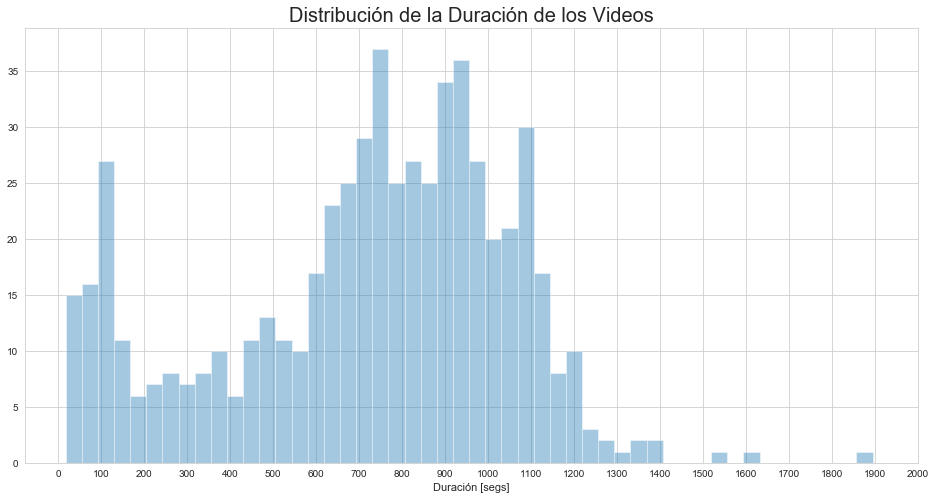

In [63]:
plt.figure(figsize=(16,8))
sns.distplot(df['Duración [segs]'].sort_values(ascending=False), bins=50, kde=False)
plt.xticks(list(range(0,2001,100)))
plt.title('Distribución de la Duración de los Videos', size=20)
plt.xlabel('Duración [segs]', size=11)

plt.show()

In [64]:
df['Duración [segs]'].sort_values(ascending=False)

588    1894.0
587    1631.0
102    1536.0
578    1392.0
279    1377.0
        ...  
92       28.0
440      28.0
106      26.0
586      22.0
435      18.0
Name: Duración [segs], Length: 590, dtype: float64

**¿Qué Tedx tiene más videos? (columna TEDx)**

In [65]:
df['TEDx'].value_counts() #El de Río de la Plata con 285 videos

TEDxRíodelaPlata    285
TEDxCórdoba         164
TEDxRosario         141
Name: TEDx, dtype: int64

Text(0.5, 1.0, 'Cantidad de videos por ciudad')

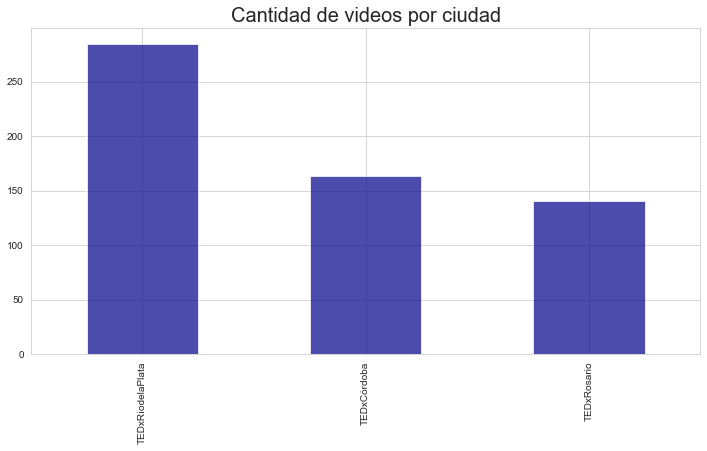

In [66]:
plt.figure(figsize=(12,6))
df['TEDx'].value_counts().plot.bar(color='darkblue', alpha=0.7)
plt.title('Cantidad de videos por ciudad', size=20)

**¿Cuál es el video de mayor duración de TEDx Rosario?**

In [67]:
df[df['TEDx']=='TEDxRosario']['Duración [segs]'].max()

1894.0

In [68]:
df[(df['TEDx']=='TEDxRosario') & (df['Duración [segs]']>=1894)] 

Fecha_Publicación                                             Titulo  \
588        2010-12-08  TEDxRosario - Claudio Fernandez - Las 3 P: Pas...   

     viewCount  likeCount  dislikeCount  commentCount  Duración [segs]  \
588      67619      248.0          17.0          19.0           1894.0   

                                                  Tags  \
588  ['investigación', 'ted talks', 'científico', '...   

                                           Descripcion      videoID  \
588  TEDxRosario se realiza en la ciudad de Rosario...  I3UAHHarpEw   

                         Edicion         TEDx  
588  TEDxRosario 2010 - 06/10/10  TEDxRosario

**Valores nulos**

In [69]:
df.isnull().sum() 

Fecha_Publicación     0
Titulo                0
viewCount             0
likeCount             0
dislikeCount          0
commentCount          0
Duración [segs]       0
Tags                  5
Descripcion          17
videoID               0
Edicion               0
TEDx                  0
dtype: int64

In [70]:
df[df['Tags'].isnull()]

Fecha_Publicación                                             Titulo  \
33         2016-11-26                       Experiencia TEDxCórdoba 2016   
225        2016-10-08                           TEDxRíodelaPlata - Parto   
226        2016-11-08                         TEDxRíodelaPlata - Mascota   
249        2015-09-24  Las matematicas son para siempre  Eduardo Saen...   
586        2012-10-18                           Spot TV TEDxRosario 2012   

     viewCount  likeCount  dislikeCount  commentCount  Duración [segs] Tags  \
33         873        8.0           0.0           1.0             99.0  NaN   
225       5185       43.0           0.0           0.0             70.0  NaN   
226       3223       45.0           0.0           2.0             69.0  NaN   
249       1265        8.0           1.0           1.0            640.0  NaN   
586        512        4.0           0.0           0.0             22.0  NaN   

                                           Descripcion      videoID  \
33   Experiencias que te cambian lo que viene, nues...  e-w2aDxvG5U   
225  Invitación a TEDxRíodelaPlata\n Más informació...  sYkvwplHUe8   
226  Invitación a TEDxRíodelaPlata\n Más informació...  DJNjmyExZqU   
249  Conferencia de Eduardo Saez de Cabezón para TE...  vQR9fQtkkUQ   
586  Spot televisivo de TEDxRosario 2012\n http://w...  eC9clS-uQYs   

                              Edicion              TEDx  
33                   TEDxCórdoba 2016       TEDxCórdoba  
225  Invitación TEDxRíodelaPlata 2016  TEDxRíodelaPlata  
226  Invitación TEDxRíodelaPlata 2016  TEDxRíodelaPlata  
249                Todos los oradores  TEDxRíodelaPlata  
586                         Favorites       TEDxRosario

In [71]:
df[df['Descripcion'].isnull()].head()

Fecha_Publicación                                             Titulo  \
160        2011-10-08  TEDx Córdoba - Intervención Artística - Avionc...   
319        2012-09-26  TEDxJoven@RíodelaPlata - Natalia Castillejo - ...   
440        2010-09-16  TEDx Río de la Plata - Ideas que vale la pena ...   
441        2011-10-19                                      Manuel Lozano   
442        2011-08-11                                   Hernán Casciari   

     viewCount  likeCount  dislikeCount  commentCount  Duración [segs]  \
160       1547        7.0           0.0           2.0             78.0   
319       6930       45.0           0.0           1.0            264.0   
440       7066        8.0           1.0           0.0             28.0   
441       9330       42.0           2.0           1.0             67.0   
442       2712       11.0           0.0           0.0             72.0   

                                                  Tags Descripcion  \
160  ['TED', 'tedx', 'tedxcba', 'tedxcordoba', 'ted...         NaN   
319  ['Argentina', 'Español', 'Spanish', 'TEDxRíode...         NaN   
440            ['ted', 'tedx', 'tedx rio de la plata']         NaN   
441                         ['Manuel', 'Lozano', '01']         NaN   
442                      ['Hernán', 'Casciari', '02']         NaN   

         videoID                                      Edicion  \
160  ES-9p48U5yg                                    Favorites   
319  QkhQu_Dz3b4                           Todos los oradores   
440  oN6kh-7JrIk                       Spots TEDxRíodelaPlata   
441  fqXjsIO4Zz8  Presentación oradores TEDxRíodelaPlata 2011   
442  XV6aN6NC_58  Presentación oradores TEDxRíodelaPlata 2011   

                 TEDx  
160       TEDxCórdoba  
319  TEDxRíodelaPlata  
440  TEDxRíodelaPlata  
441  TEDxRíodelaPlata  
442  TEDxRíodelaPlata

In [72]:
df.isnull().sum()/len(df)*100

Fecha_Publicación    0.000000
Titulo               0.000000
viewCount            0.000000
likeCount            0.000000
dislikeCount         0.000000
commentCount         0.000000
Duración [segs]      0.000000
Tags                 0.847458
Descripcion          2.881356
videoID              0.000000
Edicion              0.000000
TEDx                 0.000000
dtype: float64

Hay pocos valores nulos en este dataset: 
- 0,85% valores nulos en "Tags" 
- 2,88% valores nulos en "Descripcion"

El resto de las features no tienen valores nulos.


Al ser pocos y ser features no numéricas(no puedo completarlas realizando algún cálculo), podría eliminar estas filas sin problemas. Sin embargo, estas columnas no tienen demasiada importancia para este proyecto en particular, ya que cuando realice el modelo para predecir la cantidad de views, voy a usar valores de las otras features numéricas y que no tienen valores nulos. Por ahora voy a dejar estas columnas pero más adelante voy a quitarlas para el modelo de predicción.

**6- Agregar una columna llamada 'likeCount/viewCount' y calcular para cada registro esa división.**

In [73]:
df['likeCount/viewCount'] = df['likeCount']/df['viewCount']

In [74]:
df.head()

Fecha_Publicación                                             Titulo  \
0        2018-11-16                       Experiencia TEDxCórdoba 2018   
1        2018-12-19  Una receta para tomar riesgos | Javier Rodrígu...   
2        2019-01-14  El déficit de atención (TDAH) en la escuela | ...   
3        2018-12-19  Tanto trabajo para no trabajar | Alejandro Orl...   
4        2019-01-23  Entre el rosa y el azul | Agus Cornejo Pinti |...   

   viewCount  likeCount  dislikeCount  commentCount  Duración [segs]  \
0       1007       18.0           0.0           0.0            111.0   
1       9605      201.0           6.0           7.0            921.0   
2      55913     2148.0          45.0         286.0            385.0   
3       3285       78.0           3.0           3.0            865.0   
4        576       25.0           2.0           3.0            295.0   

                                                Tags  \
0                                        ['Córdoba']   
1  ['TEDxTalks', 'Spanish', 'Business', 'Cooking'...   
2  ['TEDxTalks', 'Spanish', 'Health', 'Activism',...   
3  ['TEDxTalks', 'Spanish', 'Entertainment', 'Art...   
4  ['TEDxTalks', 'Spanish', 'Life', 'Activism', '...   

                                         Descripcion      videoID  \
0  Más de 1600 personas colmaron las instalacione...  nnvzEfVdKwk   
1  Javier es uno de los chefs más reconocidos en ...  Q5jqL2KC4Yk   
2  En su charla nos invita a conocer cuáles son l...  n5SaHkzv468   
3  Alejandro es un actor cordobés. Desde chico de...  RkVwAxY8sGE   
4  Su charla cuenta en primera persona la incomod...  xhKTrTnXOU0   

            Edicion         TEDx  likeCount/viewCount  
0  TEDxCórdoba 2018  TEDxCórdoba             0.017875  
1  TEDxCórdoba 2018  TEDxCórdoba             0.020927  
2  TEDxCórdoba 2018  TEDxCórdoba             0.038417  
3  TEDxCórdoba 2018  TEDxCórdoba             0.023744  
4  TEDxCórdoba 2018  TEDxCórdoba             0.043403

**7- Idem punto 6, pero el indicador debe ser 'commentCount/viewCount'.**

In [75]:
df['commentCount/viewCount'] = df['commentCount']/df['viewCount']

In [76]:
df.head()

Fecha_Publicación                                             Titulo  \
0        2018-11-16                       Experiencia TEDxCórdoba 2018   
1        2018-12-19  Una receta para tomar riesgos | Javier Rodrígu...   
2        2019-01-14  El déficit de atención (TDAH) en la escuela | ...   
3        2018-12-19  Tanto trabajo para no trabajar | Alejandro Orl...   
4        2019-01-23  Entre el rosa y el azul | Agus Cornejo Pinti |...   

   viewCount  likeCount  dislikeCount  commentCount  Duración [segs]  \
0       1007       18.0           0.0           0.0            111.0   
1       9605      201.0           6.0           7.0            921.0   
2      55913     2148.0          45.0         286.0            385.0   
3       3285       78.0           3.0           3.0            865.0   
4        576       25.0           2.0           3.0            295.0   

                                                Tags  \
0                                        ['Córdoba']   
1  ['TEDxTalks', 'Spanish', 'Business', 'Cooking'...   
2  ['TEDxTalks', 'Spanish', 'Health', 'Activism',...   
3  ['TEDxTalks', 'Spanish', 'Entertainment', 'Art...   
4  ['TEDxTalks', 'Spanish', 'Life', 'Activism', '...   

                                         Descripcion      videoID  \
0  Más de 1600 personas colmaron las instalacione...  nnvzEfVdKwk   
1  Javier es uno de los chefs más reconocidos en ...  Q5jqL2KC4Yk   
2  En su charla nos invita a conocer cuáles son l...  n5SaHkzv468   
3  Alejandro es un actor cordobés. Desde chico de...  RkVwAxY8sGE   
4  Su charla cuenta en primera persona la incomod...  xhKTrTnXOU0   

            Edicion         TEDx  likeCount/viewCount  commentCount/viewCount  
0  TEDxCórdoba 2018  TEDxCórdoba             0.017875                0.000000  
1  TEDxCórdoba 2018  TEDxCórdoba             0.020927                0.000729  
2  TEDxCórdoba 2018  TEDxCórdoba             0.038417                0.005115  
3  TEDxCórdoba 2018  TEDxCórdoba             0.023744                0.000913  
4  TEDxCórdoba 2018  TEDxCórdoba             0.043403                0.005208

**8- Agregar una columna que clasifique los videos en Largos (mayores a 1000 segs), Cortos (entre 999 y 400 segs) y Muy cortos (entre 399 y 0 segs).**

In [77]:
def clasificar_video(x):
    if x >= 1000:
        x ='Largo'
    
    elif 399 < x < 1000:
        x='Corto'
        
    else:
        x='Muy corto'
    
    return x

In [78]:
clasificar_video(399)

'Muy corto'

In [79]:
df['Tipo de video'] = df['Duración [segs]'].apply(lambda x: clasificar_video(x))

In [80]:
df.head()

Fecha_Publicación                                             Titulo  \
0        2018-11-16                       Experiencia TEDxCórdoba 2018   
1        2018-12-19  Una receta para tomar riesgos | Javier Rodrígu...   
2        2019-01-14  El déficit de atención (TDAH) en la escuela | ...   
3        2018-12-19  Tanto trabajo para no trabajar | Alejandro Orl...   
4        2019-01-23  Entre el rosa y el azul | Agus Cornejo Pinti |...   

   viewCount  likeCount  dislikeCount  commentCount  Duración [segs]  \
0       1007       18.0           0.0           0.0            111.0   
1       9605      201.0           6.0           7.0            921.0   
2      55913     2148.0          45.0         286.0            385.0   
3       3285       78.0           3.0           3.0            865.0   
4        576       25.0           2.0           3.0            295.0   

                                                Tags  \
0                                        ['Córdoba']   
1  ['TEDxTalks', 'Spanish', 'Business', 'Cooking'...   
2  ['TEDxTalks', 'Spanish', 'Health', 'Activism',...   
3  ['TEDxTalks', 'Spanish', 'Entertainment', 'Art...   
4  ['TEDxTalks', 'Spanish', 'Life', 'Activism', '...   

                                         Descripcion      videoID  \
0  Más de 1600 personas colmaron las instalacione...  nnvzEfVdKwk   
1  Javier es uno de los chefs más reconocidos en ...  Q5jqL2KC4Yk   
2  En su charla nos invita a conocer cuáles son l...  n5SaHkzv468   
3  Alejandro es un actor cordobés. Desde chico de...  RkVwAxY8sGE   
4  Su charla cuenta en primera persona la incomod...  xhKTrTnXOU0   

            Edicion         TEDx  likeCount/viewCount  commentCount/viewCount  \
0  TEDxCórdoba 2018  TEDxCórdoba             0.017875                0.000000   
1  TEDxCórdoba 2018  TEDxCórdoba             0.020927                0.000729   
2  TEDxCórdoba 2018  TEDxCórdoba             0.038417                0.005115   
3  TEDxCórdoba 2018  TEDxCórdoba             0.023744                0.000913   
4  TEDxCórdoba 2018  TEDxCórdoba             0.043403                0.005208   

  Tipo de video  
0     Muy corto  
1         Corto  
2     Muy corto  
3         Corto  
4     Muy corto

Text(0.5, 1.0, 'Tipos de video por duración')

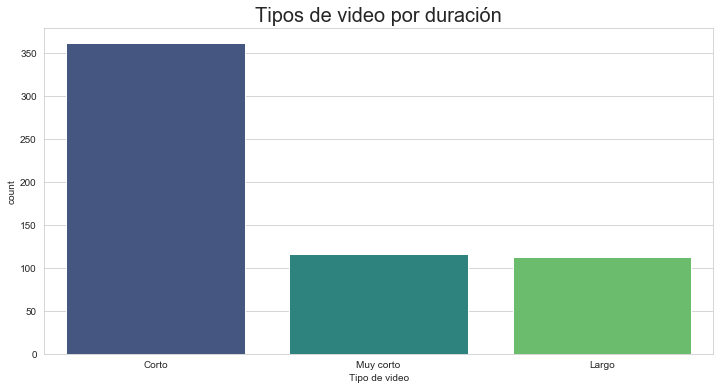

In [81]:
plt.figure(figsize=(12,6))
sns.countplot(df['Tipo de video'], order= df['Tipo de video'].value_counts().index, palette='viridis')
plt.title('Tipos de video por duración', size=20)

**9- Graficar la cantidad de videos por año (hacer un pie plot y un bar plot).**

In [82]:
df['Año'] = df['Fecha_Publicación'].apply(lambda x: x.year)

In [83]:
df.head()

Fecha_Publicación                                             Titulo  \
0        2018-11-16                       Experiencia TEDxCórdoba 2018   
1        2018-12-19  Una receta para tomar riesgos | Javier Rodrígu...   
2        2019-01-14  El déficit de atención (TDAH) en la escuela | ...   
3        2018-12-19  Tanto trabajo para no trabajar | Alejandro Orl...   
4        2019-01-23  Entre el rosa y el azul | Agus Cornejo Pinti |...   

   viewCount  likeCount  dislikeCount  commentCount  Duración [segs]  \
0       1007       18.0           0.0           0.0            111.0   
1       9605      201.0           6.0           7.0            921.0   
2      55913     2148.0          45.0         286.0            385.0   
3       3285       78.0           3.0           3.0            865.0   
4        576       25.0           2.0           3.0            295.0   

                                                Tags  \
0                                        ['Córdoba']   
1  ['TEDxTalks', 'Spanish', 'Business', 'Cooking'...   
2  ['TEDxTalks', 'Spanish', 'Health', 'Activism',...   
3  ['TEDxTalks', 'Spanish', 'Entertainment', 'Art...   
4  ['TEDxTalks', 'Spanish', 'Life', 'Activism', '...   

                                         Descripcion      videoID  \
0  Más de 1600 personas colmaron las instalacione...  nnvzEfVdKwk   
1  Javier es uno de los chefs más reconocidos en ...  Q5jqL2KC4Yk   
2  En su charla nos invita a conocer cuáles son l...  n5SaHkzv468   
3  Alejandro es un actor cordobés. Desde chico de...  RkVwAxY8sGE   
4  Su charla cuenta en primera persona la incomod...  xhKTrTnXOU0   

            Edicion         TEDx  likeCount/viewCount  commentCount/viewCount  \
0  TEDxCórdoba 2018  TEDxCórdoba             0.017875                0.000000   
1  TEDxCórdoba 2018  TEDxCórdoba             0.020927                0.000729   
2  TEDxCórdoba 2018  TEDxCórdoba             0.038417                0.005115   
3  TEDxCórdoba 2018  TEDxCórdoba             0.023744                0.000913   
4  TEDxCórdoba 2018  TEDxCórdoba             0.043403                0.005208   

  Tipo de video   Año  
0     Muy corto  2018  
1         Corto  2018  
2     Muy corto  2019  
3         Corto  2018  
4     Muy corto  2019

Text(0.5, 1.0, 'Videos por año')

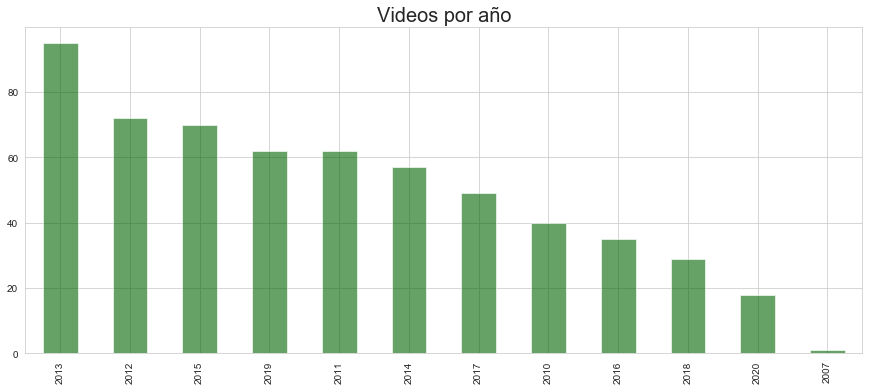

In [84]:
plt.figure(figsize=(15,6))
df['Año'].value_counts().plot.bar(color='darkgreen', alpha=0.6)
plt.title('Videos por año',size=20)

Text(0.5, 1.0, 'Videos por año')

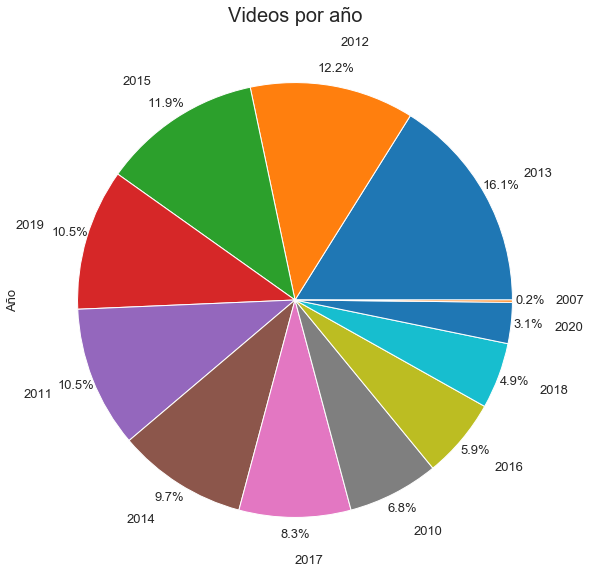

In [85]:
plt.rcParams['font.size']=13
plt.figure(figsize=(10,10))
df['Año'].value_counts().plot.pie(autopct='%1.1f%%', pctdistance=1.08, labeldistance=1.2)
plt.title('Videos por año', size=20)

### Análisis de relación entre variables y búsqueda de outliers

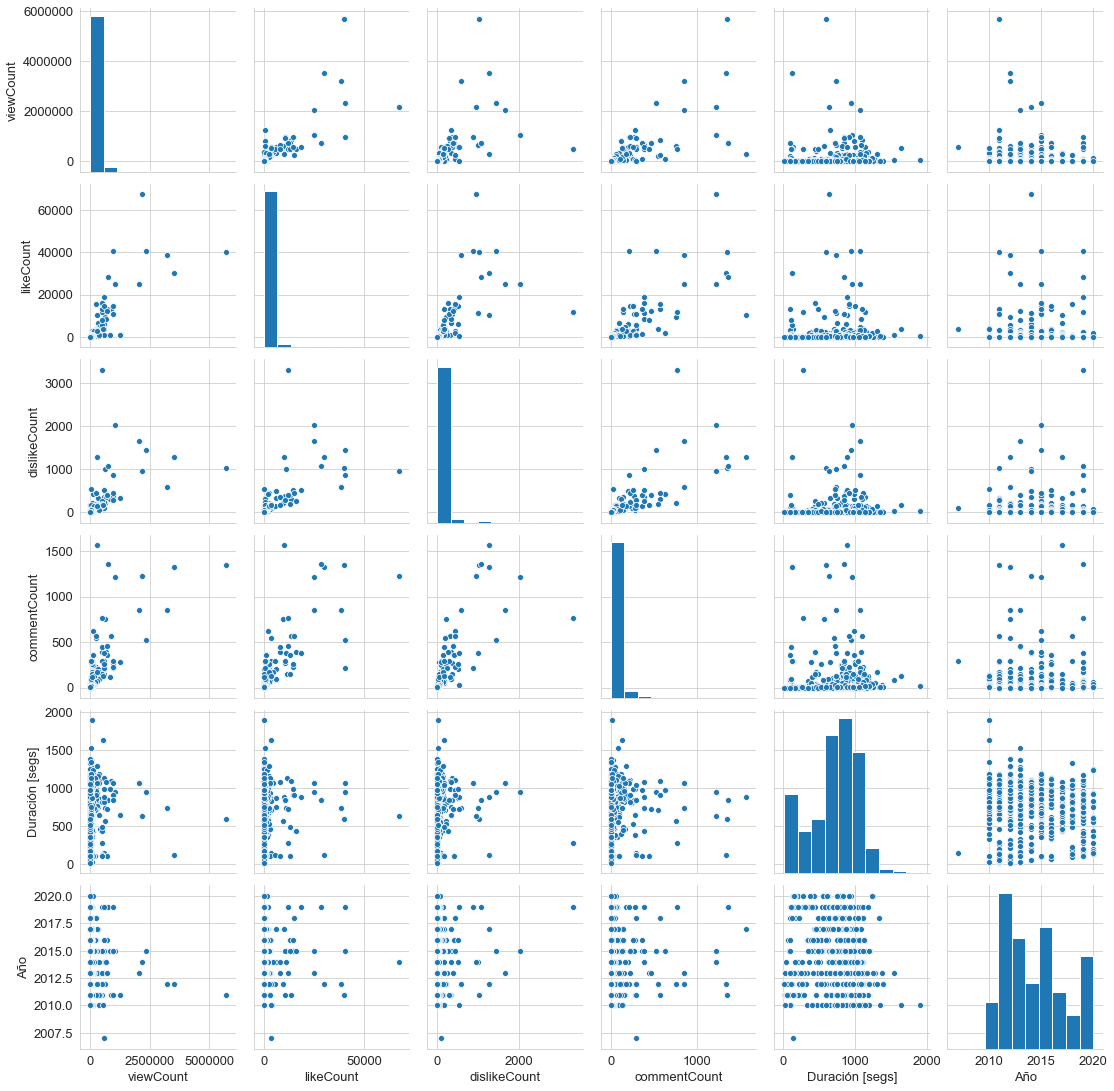

In [86]:
sns.pairplot(df.drop(['commentCount/viewCount','likeCount/viewCount'],axis=1))

Text(0.5, 1, 'Relación entre variables')

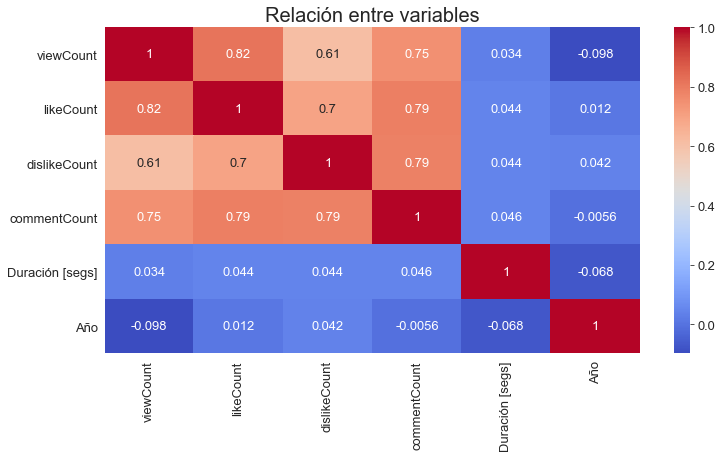

In [87]:
plt.figure(figsize=(12,6))
sns.heatmap(df.drop(['commentCount/viewCount','likeCount/viewCount'],axis=1).corr(), annot=True, cmap='coolwarm')

plt.title('Relación entre variables', size=20)

La cantidad de views está altamente relacionada con la cantidad de likes y comentarios. La duración del video tiene muy poca relación con respecto a la cantidad de views.

Text(0.5, 1, 'Cantiad de views vs Cantidad de likes')

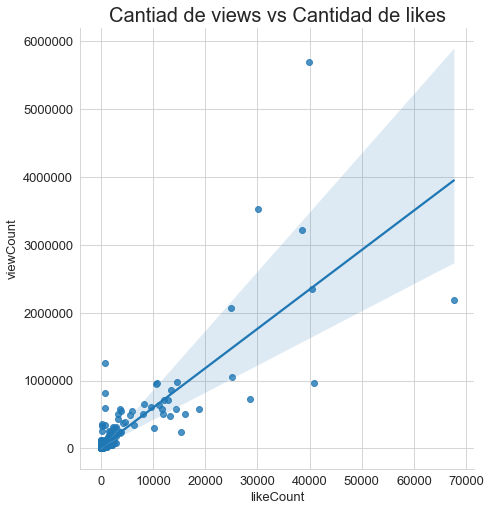

In [88]:
sns.lmplot(data=df, x='likeCount', y='viewCount', height=7)
plt.title('Cantiad de views vs Cantidad de likes', size=20)

**Distribución de Cantidad de Views (viewcount)**

A tener en cuenta: notar que hay muchos outliers en la distribución de views de los videos, la mayoría tiene menos de 1 millón de views, mientras que algunos tienen más de 3 millones. Esto puede impactar considerablemente en el modelo de predicción.

Text(0.5, 1.0, 'Distribución de Cantidad de Views (viewcount)')

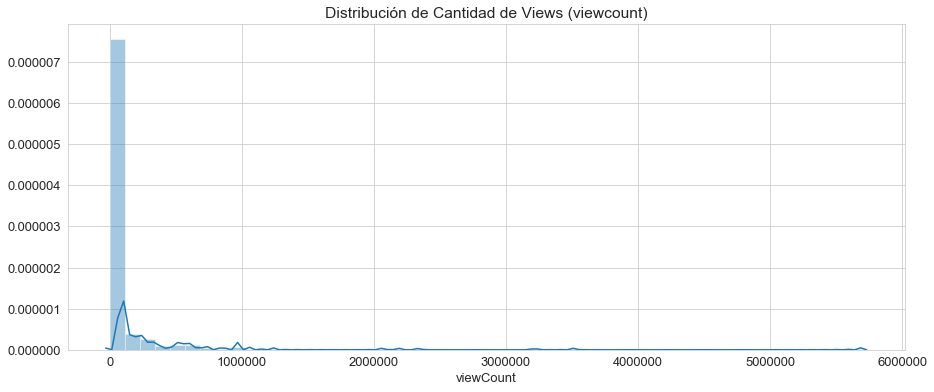

In [89]:
plt.figure(figsize=(15,6))
sns.distplot(df['viewCount'])  
plt.title('Distribución de Cantidad de Views (viewcount)')

In [90]:
len(df[df['viewCount'] > 1000000]) # 8 videos de un total de 590 contienen más de 1 millón de views, estos son outliers.

8

In [91]:
len(df[df['viewCount'] > 1000000])/len(df)*100   #Esto representa un 1,36% del dataset.

1.3559322033898304

Voy a eliminar estas 8 filas ya que representan una porción muy pequeña del dataset y además porque contienen valores muy grandes que me distorsionarían mi modelo de predicción.

In [92]:
df2 = df[df['viewCount'] < 1000000]

**Distribución de Cantidad de Likes (likecount)**

Text(0.5, 1.0, 'Distribución de Cantidad de Likes (likecount)')

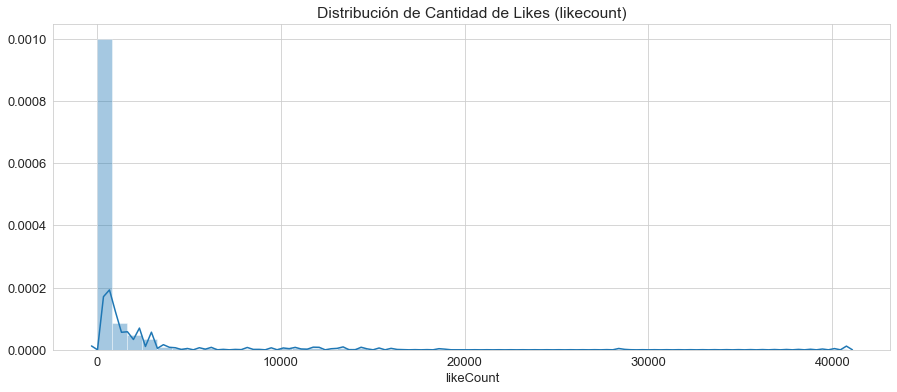

In [93]:
plt.figure(figsize=(15,6))
sns.distplot(df2['likeCount'])  
plt.title('Distribución de Cantidad de Likes (likecount)')

In [94]:
len(df2[df2['likeCount'] > 15000]) #Sólo 5 videos del total contienen más de 15000 likes

5

In [95]:
df2 = df2[df2['likeCount'] < 15000] #Elimino esos 5 outliers

**Distribución de Cantidad de comentarios (commentcount)**

Text(0.5, 1.0, 'Distribución de Cantidad de comentarios (commentcount)')

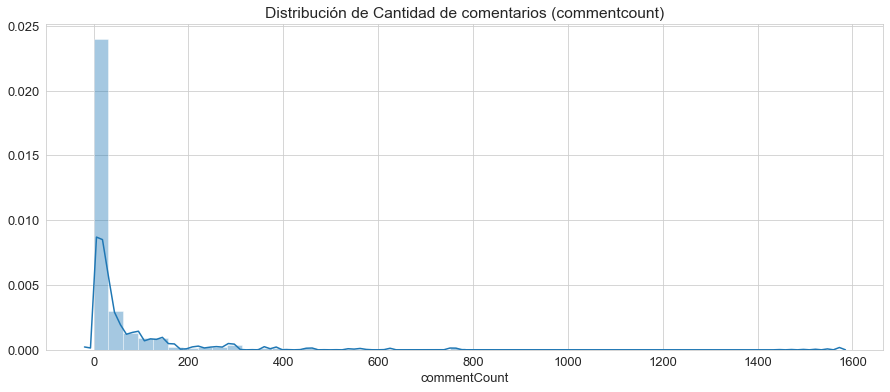

In [96]:
plt.figure(figsize=(15,6))
sns.distplot(df2['commentCount'])  
plt.title('Distribución de Cantidad de comentarios (commentcount)')

In [97]:
len(df2[df2['commentCount'] > 600]) #Sólo 4 videos con más de 600 comentarios

4

In [98]:
df2 = df2[df2['commentCount'] < 600] #Elimino esos 4 outliers

**Distribución de Cantidad de Dislikes (dislikecount)**

Text(0.5, 1.0, 'Distribución de Cantidad de Dislikes (dislikecount)')

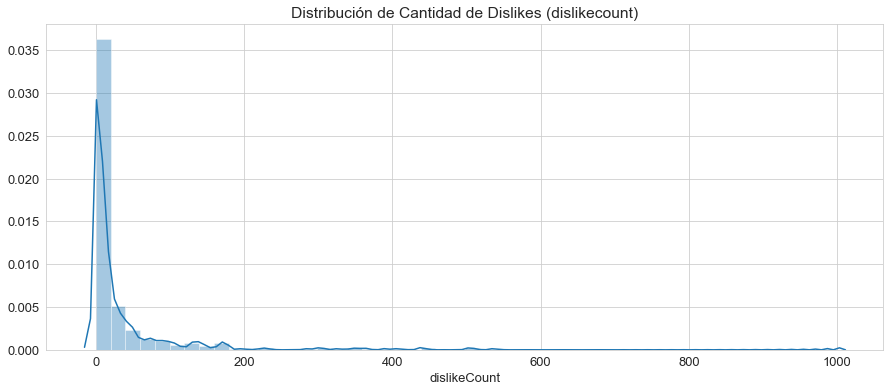

In [99]:
plt.figure(figsize=(15,6))
sns.distplot(df2['dislikeCount'])  
plt.title('Distribución de Cantidad de Dislikes (dislikecount)')

In [100]:
len(df2[df2['dislikeCount'] > 500]) #Sólo 4 videos con más de 500 dislikes

4

In [101]:
df2 = df2[df2['dislikeCount'] < 500] #elimino los 4 outliers

In [102]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 597
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Fecha_Publicación       569 non-null    datetime64[ns]
 1   Titulo                  569 non-null    object        
 2   viewCount               569 non-null    int64         
 3   likeCount               569 non-null    float64       
 4   dislikeCount            569 non-null    float64       
 5   commentCount            569 non-null    float64       
 6   Duración [segs]         569 non-null    float64       
 7   Tags                    564 non-null    object        
 8   Descripcion             552 non-null    object        
 9   videoID                 569 non-null    object        
 10  Edicion                 569 non-null    object        
 11  TEDx                    569 non-null    object        
 12  likeCount/viewCount     569 non-null    float64   

In [103]:
df2.describe().transpose()

count          mean            std     min  \
viewCount               569.0  54337.065026  128527.909465   144.0   
likeCount               569.0    637.543058    1693.840238     0.0   
dislikeCount            569.0     27.370826      60.345816     0.0   
commentCount            569.0     33.050967      70.175152     0.0   
Duración [segs]         569.0    714.165202     336.798291    18.0   
likeCount/viewCount     569.0      0.013764       0.010013     0.0   
commentCount/viewCount  569.0      0.000816       0.001136     0.0   
Año                     569.0   2014.374341       2.871443  2007.0   

                                25%           50%           75%            max  
viewCount               2898.000000  10609.000000  42891.000000  975466.000000  
likeCount                 34.000000    111.000000    436.000000   14515.000000  
dislikeCount               1.000000      5.000000     22.000000     441.000000  
commentCount               2.000000      7.000000     29.000000     565.000000  
Duración [segs]          513.000000    765.000000    954.000000    1894.000000  
likeCount/viewCount        0.006432      0.011396      0.018028       0.060205  
commentCount/viewCount     0.000237      0.000524      0.000997       0.012836  
Año                     2012.000000   2014.000000   2017.000000    2020.000000

In [104]:
len(df) - len(df2) #En resumen, se eliminaron un total de 21 filas que eran outliers en el dataset

21

In [105]:
(1 - len(df2) / len(df)) * 100 #Esto representa un 3,56% del total del dataset

3.5593220338983045

## ML

**10- Hacer un modelo al cual le paso 'likeCount', 'dislikeCount', 'commentCount', 'Duración [segs]', que me devuelve la cantidad de views que puede tener un video determinado.**

En la práctica, a la hora de utilizar ML se divide el dataset en 3:

- Dataset de entrenamiento para entrenar el modelo.
- Dataset de validación, en el que se evalúa el modelo para ver que tan bien realizó la predicción y en base a eso se ajustan los parámetros del modelo.
- Final Test dataset, en el que se realiza la prueba final del modelo. Ya no se pueden ajustar los parámetros luego de esta prueba, ya que le estaríamos insertando un sesgo al mismo.

En este caso, al ser un modelo que estoy creando a fines de aprendizaje y práctica, sólo voy a dividir el dataset en 2 (Entrenamiento y Validación).

### Análisis de Regresión

Al ser la cantidad de views(variable a predecir) una variable del tipo numérica continua y con relación lineal, voy a realizar un análisis de regresión lineal.

In [106]:
X = df2[['likeCount', 'dislikeCount', 'commentCount', 'Duración [segs]']]

y = df2['viewCount']

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Creando y entrenando el modelo**

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
lm = LinearRegression()

In [111]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Evaluación del modelo**

In [112]:
print(lm.intercept_)   #intercepción en la ecuación de regresión

-2326.6712082088125


In [113]:
coeficientes = pd.DataFrame(lm.coef_, X.columns, columns=['Coeficientes']) #Coeficientes de la ecuación de regresión
coeficientes

Coeficientes
likeCount           32.991539
dislikeCount      1040.899248
commentCount       112.263137
Duración [segs]      7.323185

**Evaluación del Modelo**

In [114]:
pred = lm.predict(X_test)

Text(0.5, 1.0, 'Predicciones vs Valores Reales')

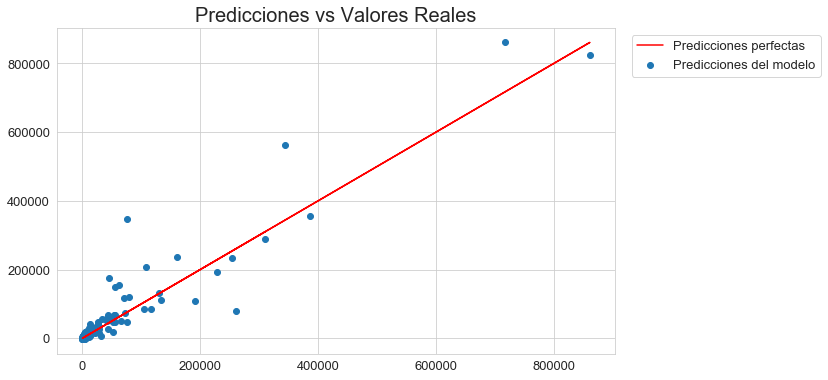

In [115]:
plt.figure(figsize=(10,6))

plt.scatter(y_test,pred, label='Predicciones del modelo')

plt.plot(y_test,y_test, 'r', label='Predicciones perfectas')

plt.legend(loc=(1.03,0.85))
plt.title('Predicciones vs Valores Reales', size=20)

In [116]:
#En Plotly

import plotly.express as px
fig = px.scatter(x=y_test, y=pred, labels={'x':'Cantidad de Views reales', 'y':'Predicciones'},
                 title='Predicciones vs Valores Reales')

fig.add_scatter(x=y_test, y=y_test, name='Predicción perfecta')
fig.show()

Text(0.5, 1.0, 'Distribución de Residuales')

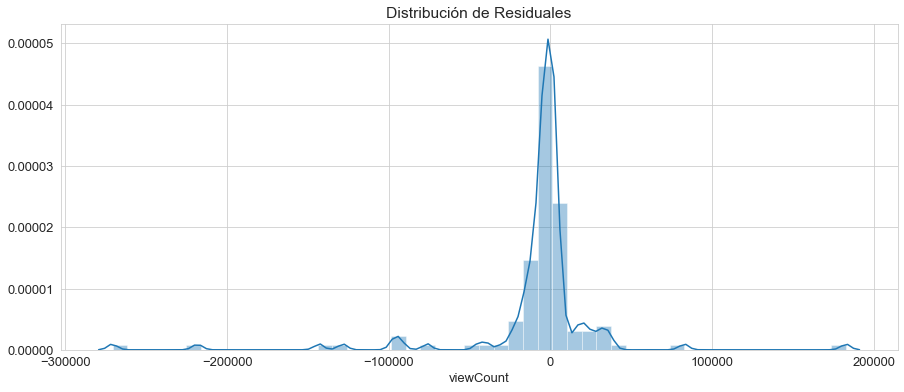

In [117]:
plt.figure(figsize=(15,6))
sns.distplot(y_test - pred,bins=50)
plt.title('Distribución de Residuales')

In [118]:
from sklearn import metrics

In [119]:
print('Error absoluto medio:', metrics.mean_absolute_error(y_test, pred))
print('Error cuadrático medio:', metrics.mean_squared_error(y_test, pred))
print('Raiz del error cuadrático medio:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Error absoluto medio: 17345.96892440084
Error cuadrático medio: 1759377047.6500266
Raiz del error cuadrático medio: 41944.928747704726


Como muestran los gráficos y las métricas calculadas, en líneas generales este modelo logra predecir con un error "aceptable" la cantidad de views. La media de los errores es de 17346 views, mientras que la raíz de la desviación cuadrática media es de 41945 views. Hay que tener en cuenta que se están analizando videos de hasta 1 millón de views, el cual es un valor bastante más grande que los valores de error. 


### Modelo de clasificación

Voy a crear una columna que clasifique a los videos según su cantidad de reproducciones (viewcount): Baja(menos de 5000 views), Media(entre 5000 y 35000 inclusive) y Alta(más de 35000 views).

In [120]:
def views_classifier(x):
    if x > 35000:
        x ='Alta'
    
    elif 5000 <= x <= 35000:
        x='Media'
        
    else:
        x='Baja'
    
    return x

In [121]:
views_classifier(35000)

'Media'

In [122]:
df2['visualización'] = df['viewCount'].apply(lambda x: views_classifier(x))

In [123]:
df2.head()

Fecha_Publicación                                             Titulo  \
0        2018-11-16                       Experiencia TEDxCórdoba 2018   
1        2018-12-19  Una receta para tomar riesgos | Javier Rodrígu...   
2        2019-01-14  El déficit de atención (TDAH) en la escuela | ...   
3        2018-12-19  Tanto trabajo para no trabajar | Alejandro Orl...   
4        2019-01-23  Entre el rosa y el azul | Agus Cornejo Pinti |...   

   viewCount  likeCount  dislikeCount  commentCount  Duración [segs]  \
0       1007       18.0           0.0           0.0            111.0   
1       9605      201.0           6.0           7.0            921.0   
2      55913     2148.0          45.0         286.0            385.0   
3       3285       78.0           3.0           3.0            865.0   
4        576       25.0           2.0           3.0            295.0   

                                                Tags  \
0                                        ['Córdoba']   
1  ['TEDxTalks', 'Spanish', 'Business', 'Cooking'...   
2  ['TEDxTalks', 'Spanish', 'Health', 'Activism',...   
3  ['TEDxTalks', 'Spanish', 'Entertainment', 'Art...   
4  ['TEDxTalks', 'Spanish', 'Life', 'Activism', '...   

                                         Descripcion      videoID  \
0  Más de 1600 personas colmaron las instalacione...  nnvzEfVdKwk   
1  Javier es uno de los chefs más reconocidos en ...  Q5jqL2KC4Yk   
2  En su charla nos invita a conocer cuáles son l...  n5SaHkzv468   
3  Alejandro es un actor cordobés. Desde chico de...  RkVwAxY8sGE   
4  Su charla cuenta en primera persona la incomod...  xhKTrTnXOU0   

            Edicion         TEDx  likeCount/viewCount  commentCount/viewCount  \
0  TEDxCórdoba 2018  TEDxCórdoba             0.017875                0.000000   
1  TEDxCórdoba 2018  TEDxCórdoba             0.020927                0.000729   
2  TEDxCórdoba 2018  TEDxCórdoba             0.038417                0.005115   
3  TEDxCórdoba 2018  TEDxCórdoba             0.023744                0.000913   
4  TEDxCórdoba 2018  TEDxCórdoba             0.043403                0.005208   

  Tipo de video   Año visualización  
0     Muy corto  2018          Baja  
1         Corto  2018         Media  
2     Muy corto  2019          Alta  
3         Corto  2018          Baja  
4     Muy corto  2019          Baja

Text(0.5, 1.0, 'Videos según cantidad de reproducciones')

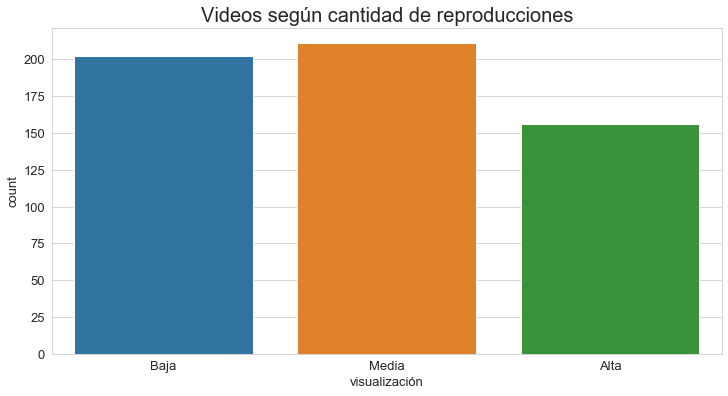

In [124]:
plt.figure(figsize=(12,6))
sns.countplot(df2['visualización'])

plt.title('Videos según cantidad de reproducciones', size=20)

**Modelo SVC**

En este caso voy a usar un modelo de clasificación para definir en qué categoría puede caer un video teniendo en cuenta sus features('likeCount', 'dislikeCount', 'commentCount', 'Duración (segs)'). Voy a usar Support Vector Machine Classifier como estimador. [Buena guía para elegir el mejor estimador en ML](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

In [125]:
X = df2[['likeCount', 'dislikeCount', 'commentCount', 'Duración [segs]']]

y = df2['visualización']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Escalo las variables**

In [127]:
from sklearn.preprocessing import MinMaxScaler

In [128]:
scaler = MinMaxScaler()

In [129]:
X_train = scaler.fit_transform(X_train)

In [130]:
X_test = scaler.transform(X_test)

**Creando y entrenando el modelo**

In [131]:
from sklearn.svm import SVC

In [132]:
model = SVC()

In [133]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Evaluación del modelo**

In [134]:
pred = model.predict(X_test)

In [135]:
from sklearn.metrics import classification_report, confusion_matrix

In [136]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test,pred))

[[26  0  9]
 [ 0 38 20]
 [ 2 10 38]]


              precision    recall  f1-score   support

        Alta       0.93      0.74      0.83        35
        Baja       0.79      0.66      0.72        58
       Media       0.57      0.76      0.65        50

    accuracy                           0.71       143
   macro avg       0.76      0.72      0.73       143
weighted avg       0.75      0.71      0.72       143



El modelo no esta prediciendo muy bien la categoría de los videos. Esto significa que que hay que ajustar los parámetros del mismo. Voy a buscar los parámetros correctos de [C y gamma](https://medium.com/@myselfaman12345/c-and-gamma-in-svm-e6cee48626be) utilizando GridSearch. Con este método, puedo probar diferentes combinaciones y ver cuál es la que mejor realiza la estimación.

In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
param_grid={'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}

In [139]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.477, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.553, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.576, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.494, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.518, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.372, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.372, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.388, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.376, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.376, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.376, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.744, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.612, total=   0.0s
[CV] 

[CV] ................. C=100, gamma=0.0001, score=0.388, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] ................. C=100, gamma=0.0001, score=0.376, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] ................. C=100, gamma=0.0001, score=0.376, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] ................. C=100, gamma=0.0001, score=0.376, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.860, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.788, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.729, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [140]:
grid.best_params_

{'C': 1000, 'gamma': 1}

In [141]:
grid.best_estimator_

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [142]:
grid_pred = grid.predict(X_test)

In [143]:
print(confusion_matrix(y_test, grid_pred))
print('\n')
print(classification_report(y_test,grid_pred))

[[29  0  6]
 [ 0 52  6]
 [ 3  9 38]]


              precision    recall  f1-score   support

        Alta       0.91      0.83      0.87        35
        Baja       0.85      0.90      0.87        58
       Media       0.76      0.76      0.76        50

    accuracy                           0.83       143
   macro avg       0.84      0.83      0.83       143
weighted avg       0.83      0.83      0.83       143



Puede verse que el modelo mejoró su performance luego de utilizar GridSearch para encontrar los parámetros correctos. De todas maneras, el modelo tiene problemas a la hora de clasificar los videos de categoría "media", con un puntaje de 0.76 en f1. 

## Bonus track: 
**11- Hacer una wordcloud de los tags más mencionados.**

In [144]:
from wordcloud import WordCloud, STOPWORDS

In [145]:
text = " ".join(tag for tag in df['Tags'].dropna())

In [146]:
type(text)

str

In [147]:
stopwords= STOPWORDS

In [148]:
stopwords.update(["TEDxTalks'", "ted'","ted", "tedx", "tedx'", "talks'", "talk'",
                  "Spanish'", "Argentina'", "Español'", "X'", "TEDxRíodelaPlata'",
                  "TEDxRiodelaPlata'", "Aires'"])

(-0.5, 1299.5, 599.5, -0.5)

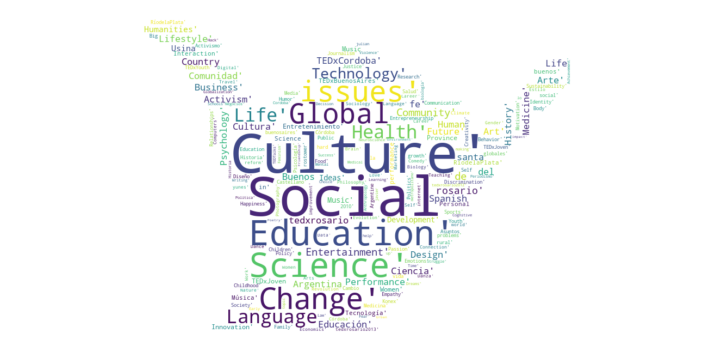

In [149]:
from PIL import Image

mask = np.array(Image.open('wordcloud mask.png'))


wordcloud = WordCloud(width = 5000, height = 2000, random_state=1,background_color='white',
                      colormap='viridis_r', collocations=False, stopwords=stopwords, mask=mask).generate(text)

plt.figure(figsize=(13,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')